Mounted at /content/gdrive


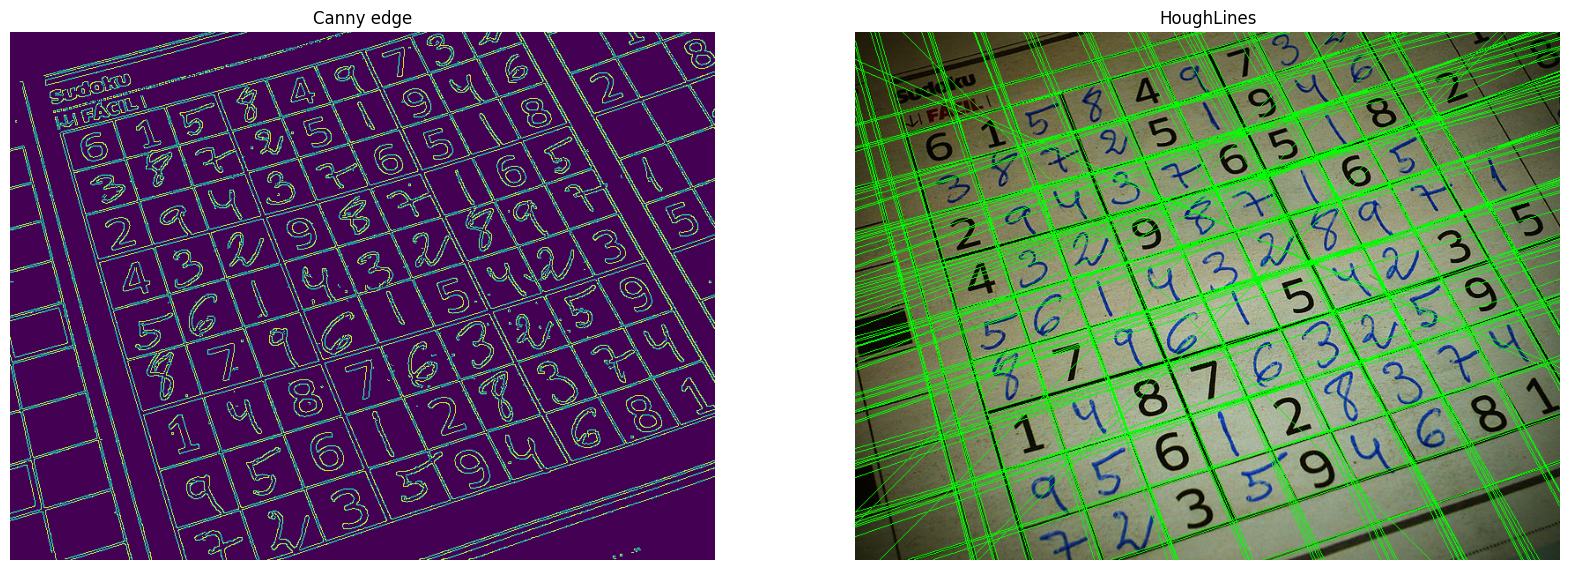

In [ ]:
#연습 12-1) Hough 변환을 이용한 직선구하기
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2
drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Sudoku.jpg')
#원본 영상을 복사
img2 = img.copy()

#영상을 그레이 영상으로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Canny 에지 검출기를 이용해 에지 검출 (임계값 2개)
edges = cv2.Canny(gray, 130, 230)
#Hough 변환을 이용해 직선 검출
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

#직선을 원본 영상에 표현
for line in lines:
    rho, theta = line[0]
    # 원점에서 직선에 수선을 내렸을 때 만나는 좌표 (x0, y0) 구하기
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1,y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
    x2,y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
    #원본 영상에 녹색선으로 표시
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

RGB_img = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
#Canny 에지 검출 / 허프 직선 검출 영상 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Canny edge')
plt.imshow(edges)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title('HoughLines')
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

Mounted at /content/gdrive


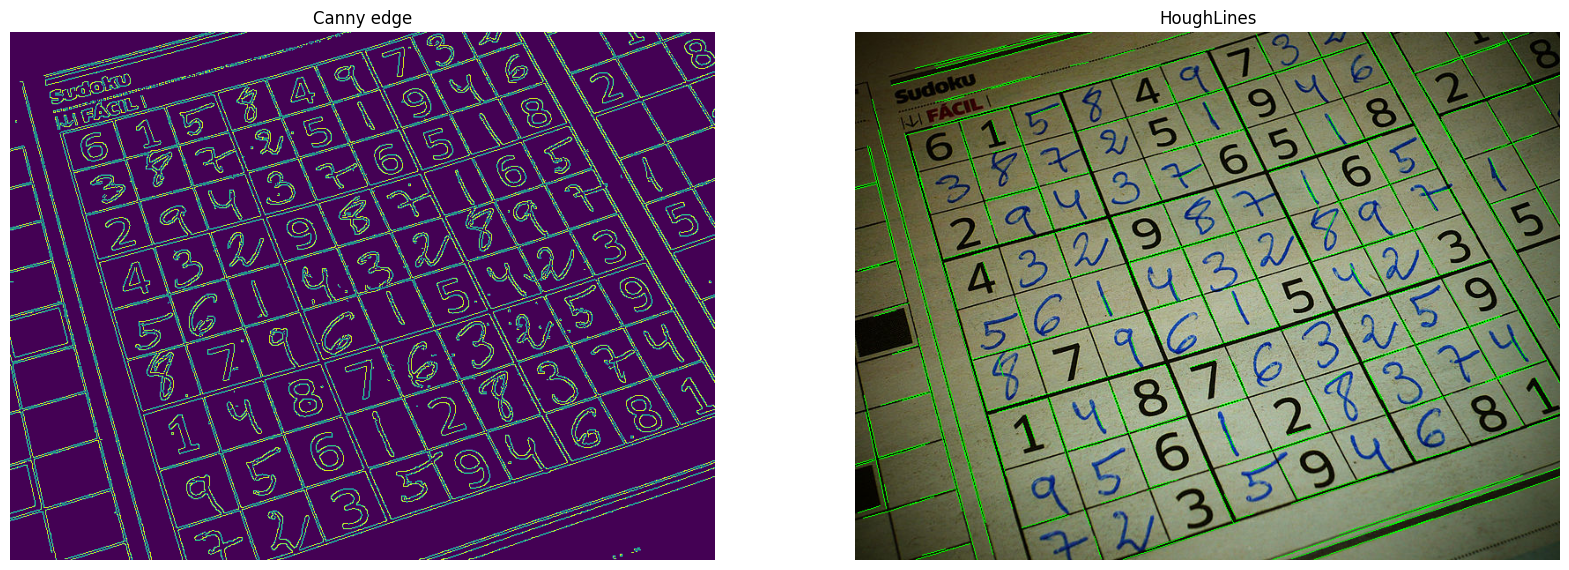

In [ ]:
#연습 12-2)확률적 허프 직선 검출

import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2
drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Sudoku.jpg')
#원본 영상을 복사
img2 = img.copy()

#영상을 그레이 영상으로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Canny 에지 검출기를 이용해 에지 검출 (임계값 2개)
edges = cv2.Canny(gray, 130, 230)
#확률적 Hough 변환을 이용해 직선 검출
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)

#직선을 원본 영상에 표현
for line in lines:
    # 검출된 선 그리기
    x1, y1, x2, y2 = line[0]
    #원본 영상에 녹색선으로 표시
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

RGB_img = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
#Canny 에지 검출 / 허프 직선 검출 영상 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Canny edge')
plt.imshow(edges)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title('HoughLines')
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


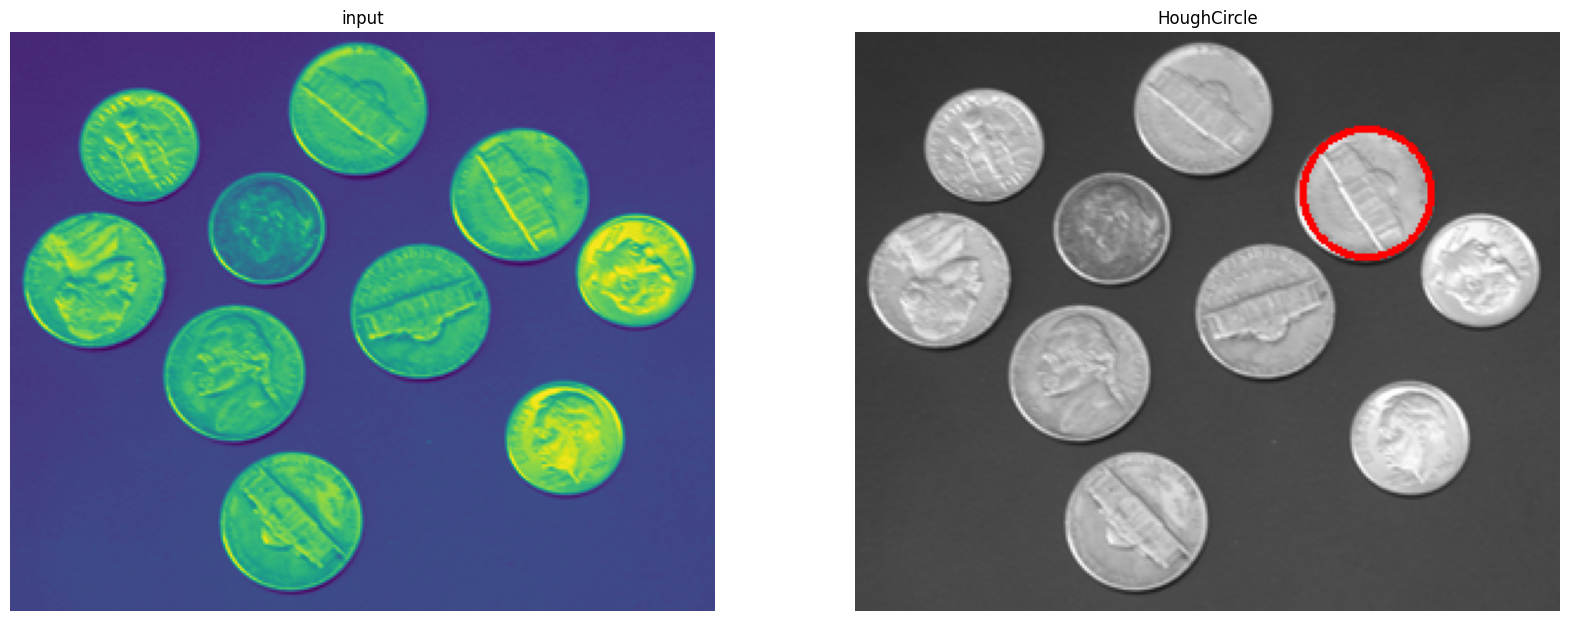

In [15]:
#연습문제 2) Hough 변환을 이용한 원 검출하기
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2
drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/coin.png')
#원본 영상을 복사
img2 = img.copy()

#영상을 그레이 영상으로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 블러를 통해 노이즈 제거
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 40, 210, 40)

for i in circles[0,:]: # 검출된 원 갯수만큼 반복
     cv2.circle(img2, (int(i[0]),int(i[1])), int(i[2]), (0, 0, 255), 2) # 저장된 데이터를 이용해 원 그리기

RGB_img = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
#Canny 에지 검출 / 허프 직선 검출 영상 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(gray)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title('HoughCircle')
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
%cd /content/gdrive/MyDrive/Image_Processing/프로그램코드

/content/gdrive/MyDrive/Image_Processing/프로그램코드


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(517, 0) (87, 356)


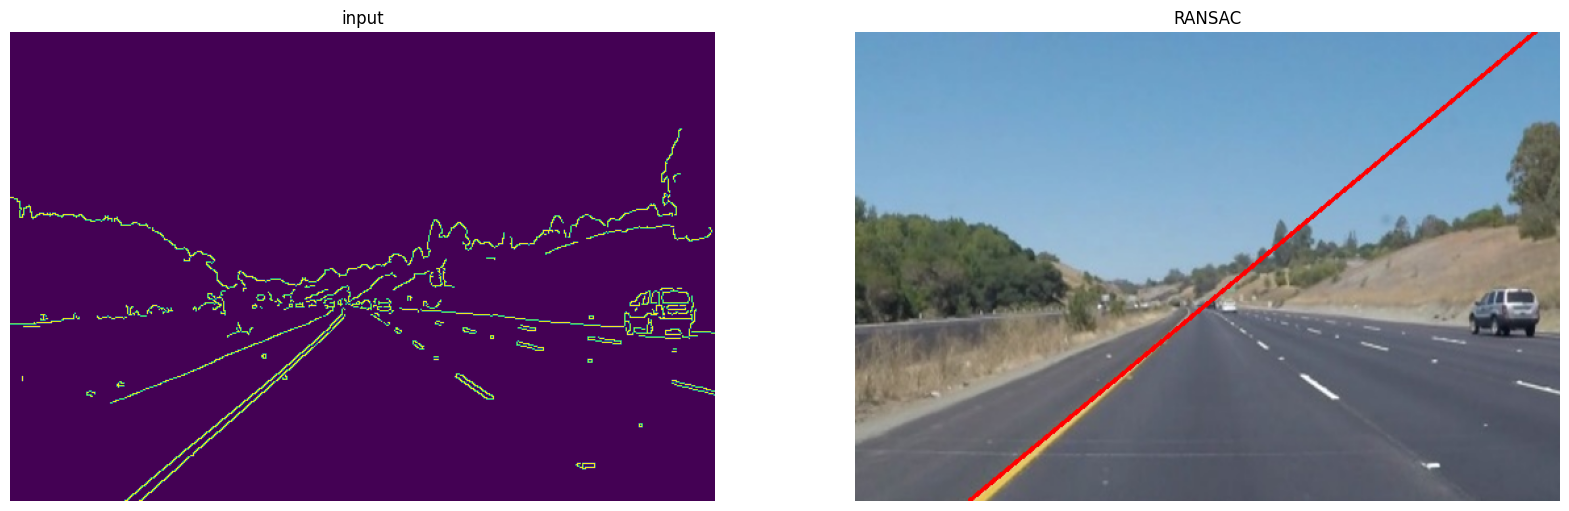

In [21]:
#연습 12-3) RANSAC을 이용한 직선 검출
import matplotlib.pyplot as plt
import numpy as np
import import_ipynb
from custom_ransac import RANSAC
from google.colab import drive
import cv2
drive.mount('/content/gdrive')
#영상불러오기 (여기서는 프로그램 코드와 동일한 경로에 이미지를 넣어 두었다.)
img = cv2.imread('/content/gdrive/MyDrive/Image_Processing/프로그램코드/road.png')

#영상을 그레이 영상으로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 블러를 통해 노이즈 제거
edges = cv2.Canny(gray, 130, 230)
# image: array of edged image.
# sigma: closing distance to the line (e.g. closer will be narrower line)
# epochs: number of iterations to find the best line (default 100)

best_a, best_b = RANSAC.fit_RANSAC(edges, epochs=200, sigma=2)
# best_a: a matrix coordinates for best fitted line.
# best_b: b matrix coordinates for best fitted line
# edges.shape[0]: image height
# edges.shape[1]: image width
starting_point, ending_point = RANSAC.generate_extends(best_a, best_b, edges.shape[0], edges.shape[1])

cv2.line(img, starting_point,ending_point, (0, 0, 255), 2)
print(starting_point,ending_point)
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#Canny 에지 검출 / RANSAC 직선 검출 영상 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(edges)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title('RANSAC')
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

In [7]:
%ls

 4장-연습문제.ipynb    연습2-2.ipynb        연습3-7.ipynb   연습5-5.ipynb   연습7-6.ipynb
 custom_ransac.ipynb   연습2-3.ipynb        연습3-8.ipynb   연습5-6.ipynb   연습8-1.ipynb
 ImageCartoon.ipynb   '연습2-4 (1).ipynb'   연습3-9.ipynb   연습6-1.ipynb   연습8-2.ipynb
 New-Chap10.ipynb      연습2-4.ipynb        연습4-1.ipynb   연습6-2.ipynb   연습8-3.ipynb
 New-Chap12.ipynb      연습3-10.ipynb       연습4-2.ipynb   연습6-3.ipynb   연습8-4.ipynb
 연습10-3.ipynb        연습3-11.ipynb       연습4-3.ipynb   연습6-4.ipynb   연습9-1.ipynb
 연습11-1.ipynb        연습3-1.ipynb        연습4-4.ipynb   연습6-5.ipynb   연습9-2.ipynb
 연습11-2.ipynb        연습3-2.ipynb        연습4-5.ipynb   연습6-6.ipynb   연습9-3.ipynb
 연습11-3.ipynb        연습3-3.ipynb        연습4-6.ipynb   연습7-1.ipynb   연습9-4.ipynb
 연습11-4.ipynb        연습3-4.ipynb        연습5-1.ipynb   연습7-2.ipynb   연습9-5.ipynb
 연스

In [16]:
!pip install import_ipynb